# Import and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
plant1 = pd.read_csv(
    'solar_data/Plant_1_Generation_Data.csv', low_memory=False)
plant1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [3]:
plant1 = plant1.groupby('DATE_TIME')[
    ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].agg('sum')
plant1

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,
01-06-2020 00:00,0.0,0.0,5407.250000,153519480.0
01-06-2020 00:15,0.0,0.0,0.000000,153519480.0
01-06-2020 00:30,0.0,0.0,0.000000,153519480.0
01-06-2020 00:45,0.0,0.0,0.000000,153519480.0
01-06-2020 01:00,0.0,0.0,0.000000,153519480.0
...,...,...,...,...
31-05-2020 22:45,0.0,0.0,125291.000000,153519480.0
31-05-2020 23:00,0.0,0.0,125291.000000,153519480.0
31-05-2020 23:15,0.0,0.0,125291.000000,153519480.0


In [4]:
plant1.reset_index(inplace=True)
plant1

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,01-06-2020 00:00,0.0,0.0,5407.250000,153519480.0
1,01-06-2020 00:15,0.0,0.0,0.000000,153519480.0
2,01-06-2020 00:30,0.0,0.0,0.000000,153519480.0
3,01-06-2020 00:45,0.0,0.0,0.000000,153519480.0
4,01-06-2020 01:00,0.0,0.0,0.000000,153519480.0
...,...,...,...,...,...
3153,31-05-2020 22:45,0.0,0.0,125291.000000,153519480.0
3154,31-05-2020 23:00,0.0,0.0,125291.000000,153519480.0
3155,31-05-2020 23:15,0.0,0.0,125291.000000,153519480.0
3156,31-05-2020 23:30,0.0,0.0,125291.000000,153519480.0


In [5]:
plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    3158 non-null   object 
 1   DC_POWER     3158 non-null   float64
 2   AC_POWER     3158 non-null   float64
 3   DAILY_YIELD  3158 non-null   float64
 4   TOTAL_YIELD  3158 non-null   float64
dtypes: float64(4), object(1)
memory usage: 123.5+ KB


In [6]:
plant1['DATE_TIME'] = pd.to_datetime(plant1['DATE_TIME'])
plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    3158 non-null   datetime64[ns]
 1   DC_POWER     3158 non-null   float64       
 2   AC_POWER     3158 non-null   float64       
 3   DAILY_YIELD  3158 non-null   float64       
 4   TOTAL_YIELD  3158 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 123.5 KB


In [7]:
plant1['Year'] = plant1['DATE_TIME'].dt.year
plant1['Month'] = plant1['DATE_TIME'].dt.month
plant1['Day'] = plant1['DATE_TIME'].dt.day
plant1['Hour'] = plant1['DATE_TIME'].dt.hour
plant1['Minute'] = plant1['DATE_TIME'].dt.minute
plant1

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Year,Month,Day,Hour,Minute
0,2020-01-06 00:00:00,0.0,0.0,5407.250000,153519480.0,2020,1,6,0,0
1,2020-01-06 00:15:00,0.0,0.0,0.000000,153519480.0,2020,1,6,0,15
2,2020-01-06 00:30:00,0.0,0.0,0.000000,153519480.0,2020,1,6,0,30
3,2020-01-06 00:45:00,0.0,0.0,0.000000,153519480.0,2020,1,6,0,45
4,2020-01-06 01:00:00,0.0,0.0,0.000000,153519480.0,2020,1,6,1,0
...,...,...,...,...,...,...,...,...,...,...
3153,2020-05-31 22:45:00,0.0,0.0,125291.000000,153519480.0,2020,5,31,22,45
3154,2020-05-31 23:00:00,0.0,0.0,125291.000000,153519480.0,2020,5,31,23,0
3155,2020-05-31 23:15:00,0.0,0.0,125291.000000,153519480.0,2020,5,31,23,15
3156,2020-05-31 23:30:00,0.0,0.0,125291.000000,153519480.0,2020,5,31,23,30


In [8]:
del plant1['DATE_TIME']

In [9]:
plant1

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Year,Month,Day,Hour,Minute
0,0.0,0.0,5407.250000,153519480.0,2020,1,6,0,0
1,0.0,0.0,0.000000,153519480.0,2020,1,6,0,15
2,0.0,0.0,0.000000,153519480.0,2020,1,6,0,30
3,0.0,0.0,0.000000,153519480.0,2020,1,6,0,45
4,0.0,0.0,0.000000,153519480.0,2020,1,6,1,0
...,...,...,...,...,...,...,...,...,...
3153,0.0,0.0,125291.000000,153519480.0,2020,5,31,22,45
3154,0.0,0.0,125291.000000,153519480.0,2020,5,31,23,0
3155,0.0,0.0,125291.000000,153519480.0,2020,5,31,23,15
3156,0.0,0.0,125291.000000,153519480.0,2020,5,31,23,30


In [10]:
plant1.isna().sum()

DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
Year           0
Month          0
Day            0
Hour           0
Minute         0
dtype: int64

In [11]:
plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DC_POWER     3158 non-null   float64
 1   AC_POWER     3158 non-null   float64
 2   DAILY_YIELD  3158 non-null   float64
 3   TOTAL_YIELD  3158 non-null   float64
 4   Year         3158 non-null   int64  
 5   Month        3158 non-null   int64  
 6   Day          3158 non-null   int64  
 7   Hour         3158 non-null   int64  
 8   Minute       3158 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 222.2 KB


In [12]:
plant1.Year.value_counts()

2020    3158
Name: Year, dtype: int64

In [13]:
del plant1['Year']

In [14]:
plant1

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Month,Day,Hour,Minute
0,0.0,0.0,5407.250000,153519480.0,1,6,0,0
1,0.0,0.0,0.000000,153519480.0,1,6,0,15
2,0.0,0.0,0.000000,153519480.0,1,6,0,30
3,0.0,0.0,0.000000,153519480.0,1,6,0,45
4,0.0,0.0,0.000000,153519480.0,1,6,1,0
...,...,...,...,...,...,...,...,...
3153,0.0,0.0,125291.000000,153519480.0,5,31,22,45
3154,0.0,0.0,125291.000000,153519480.0,5,31,23,0
3155,0.0,0.0,125291.000000,153519480.0,5,31,23,15
3156,0.0,0.0,125291.000000,153519480.0,5,31,23,30


# Modeling

## Split data and find base result

In [15]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [16]:
X = plant1.drop(columns=['DAILY_YIELD'], axis=1)
y = plant1['DAILY_YIELD']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2526, 7), (2526,), (632, 7), (632,))

In [17]:
models = {
    'Elastic Net': ElasticNet(),
    'Ridge': Ridge(),
    'Random Forest': RandomForestRegressor()
}


def fit_scores(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        np.random.seed(42)
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [18]:
base_results = fit_scores(models, X_train, X_test, y_train, y_test)
base_results

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1392942230328.6929, tolerance: 1102452673.8365915
  model = cd_fast.enet_coordinate_descent(


{'Elastic Net': 0.7446002487811549,
 'Ridge': 0.7447312882996436,
 'Random Forest': 0.9922872931056886}

<AxesSubplot:>

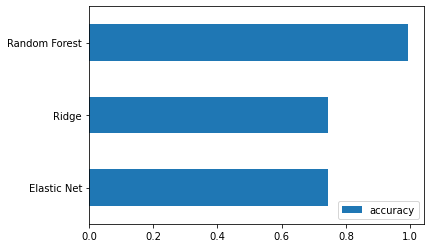

In [19]:
base_compare = pd.DataFrame(base_results, index=['accuracy'])
base_compare.T.plot.barh()

In [20]:
# from sklearn.model_selection import RandomizedSearchCV

# rcv_grid = {
#     'n_estimators': np.arange(10, 100, 10),
#     'max_depth': [None, 3, 5, 10],
#     'min_samples_split': np.arange(2, 20, 2),
#     'min_samples_leaf': np.arange(1, 20, 2),
#     'max_features': [0.5, 1, 'sqrt', 'auto'],
#     'max_samples': [1000]
# }

# rcv_model = RandomizedSearchCV(estimator=RandomForestRegressor(
#     n_jobs=-1, random_state=42), param_distributions=rcv_grid, cv=5, verbose=True, n_iter=3)
# rcv_model.fit(X_train, y_train)

In [21]:
# best_params = rcv_model.best_params_
# best_params

In [22]:
# best_rcv = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators=best_params['n_estimators'],
#                                 min_samples_split=best_params['min_samples_split'],
#                                 min_samples_leaf=best_params['min_samples_leaf'],
#                                 max_samples=best_params['max_samples'],
#                                 max_features=best_params['max_features'],
#                                 max_depth=best_params['max_depth'])
# best_rcv.fit(X_train, y_train)

In [23]:
# best_rcv.score(X_test, y_test)

## Elastic Net Hyperparameter Tuning with GridSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

np.random.seed(42)

EN_grid = {"max_iter": [1, 5, 10],
           "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
           "l1_ratio": np.arange(0.0, 1.0, 0.1),
           "normalize": [True, False],
           "selection": ['cyclic', 'random']}

EN_gs = GridSearchCV(ElasticNet(), param_grid=EN_grid,
                     cv=5, verbose=True, n_jobs=-1)

EN_gs.fit(X_train, y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:   15.0s finished
C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1349388463107.715, tolerance: 1102452673.8365915
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10], 'normalize': [True, False],
                         'selection': ['cyclic', 'random']},
             verbose=True)

In [25]:
EN_gs.best_params_

{'alpha': 0.001,
 'l1_ratio': 0.6000000000000001,
 'max_iter': 5,
 'normalize': False,
 'selection': 'random'}

In [26]:
best_EN = ElasticNet(random_state=42, **EN_gs.best_params_)

best_EN.fit(X_train, y_train)

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1349388463107.715, tolerance: 1102452673.8365915
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.001, l1_ratio=0.6000000000000001, max_iter=5,
           random_state=42, selection='random')

In [27]:
best_EN.score(X_test, y_test)

0.7446766222551322

## Elastic Net Evaluation

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


def evaluate_test(model):
    test_preds = model.predict(X_test)
    test_scores = {
        "Mean Squared Error": mean_squared_error(y_test, test_preds),
        "Root Mean Squared Error": np.sqrt(mean_squared_error(y_test, test_preds)),
        "Mean Absolute Error": mean_absolute_error(y_test, test_preds),
        "R2 Score": r2_score(y_test, test_preds),
        "Explained Variance Score": explained_variance_score(y_test, test_preds)
    }
    return test_scores

In [29]:
EN_eval = evaluate_test(best_EN)
EN_eval

{'Mean Squared Error': 1097513740.4997087,
 'Root Mean Squared Error': 33128.7449279279,
 'Mean Absolute Error': 26372.691479613673,
 'R2 Score': 0.7446766222551322,
 'Explained Variance Score': 0.744724298801924}

In [30]:
test_preds = best_EN.predict(X_test)
test_preds

array([149838.83408997, 116480.93730654, 158088.68304131, -27782.05477693,
        68238.28763328,  -3086.47803943,  30142.10123421,  96224.82639847,
       110062.44566492,  94632.32148363,  76375.30299899,  75394.22961292,
        43790.13745441, 133649.59668174, -28750.51404198, 134912.17900555,
        75220.92180589, 150201.78066472, 113188.35651082,  97256.79160575,
       152731.28133532,  92756.96112735, 105541.39296504, -17579.96007849,
         -619.09159451,  -2288.8516252 , 162810.91688303,  61077.74408745,
        86681.37214201,  30684.29365648, 117840.67634398,  75494.24916798,
         6249.06892703,  40724.1362114 ,  15574.90525608,  89165.15036222,
        -8209.86334279,  72099.79122199, -27211.53929628,  92506.97918589,
         8498.31056554, -18959.36315393, -17699.5312021 ,  42598.43490698,
       115438.64290692, -11176.62154335,  87927.23084575, -27608.84730466,
        58867.78052456,  12459.14535112, 110998.76574305,  22174.64874031,
        96807.86495682, 1

In [31]:
EN_compare = pd.DataFrame(data={
    "Actual values": y_test,
    "Predict values": test_preds
})
EN_compare['differences'] = EN_compare['Predict values'] - \
    EN_compare['Actual values']
EN_compare

,Actual values,Predict values,differences
3053,159056.000000,149838.834090,-9217.165910
2681,169895.178571,116480.937307,-53414.241264
2961,80126.000000,158088.683041,77962.683041
2335,0.000000,-27782.054777,-27782.054777
139,54073.571429,68238.287633,14164.716204
...,...,...,...
1229,185308.000000,131663.873100,-53644.126900
2488,166298.500000,109687.325657,-56611.174343
2522,0.000000,-21746.787205,-21746.787205
2234,108152.000000,162978.474658,54826.474658


In [32]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cv_EN = cross_val_score(best_EN, X, y, cv=10, scoring='r2', n_jobs=-1)
np.mean(cv_EN)

0.7302098776852041

## Ridge Hyperparameter Tuning with Grid SearchCV

In [33]:
ridge_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0], "fit_intercept": [
    True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge_gs = GridSearchCV(
    Ridge(), n_jobs=-1, param_grid=ridge_grid, cv=5, verbose=True)

ridge_gs.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   11.9s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             verbose=True)

In [34]:
ridge_gs.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'cholesky'}

In [35]:
best_ridge = Ridge(
    random_state=42, **ridge_gs.best_params_)

best_ridge.fit(X_train, y_train)

Ridge(alpha=1, random_state=42, solver='cholesky')

In [36]:
best_ridge.score(X_test, y_test)

0.7447312882996436

## Ridge Evaluation

In [37]:
ridge_eval = evaluate_test(best_ridge)
ridge_eval

{'Mean Squared Error': 1097278757.1796541,
 'Root Mean Squared Error': 33125.198220986604,
 'Mean Absolute Error': 26337.33395465154,
 'R2 Score': 0.7447312882996436,
 'Explained Variance Score': 0.7447836770868876}

In [38]:
test_preds2 = best_ridge.predict(X_test)
np.median(test_preds2)

79536.79976980192

In [39]:
ridge_compare = pd.DataFrame({
    "actual values": y_test,
    "predict values": test_preds2
})

ridge_compare['differences'] = ridge_compare['predict values'] - \
    ridge_compare['actual values']
ridge_compare

,actual values,predict values,differences
3053,159056.000000,150152.515170,-8903.484830
2681,169895.178571,114505.660448,-55389.518123
2961,80126.000000,158405.906556,78279.906556
2335,0.000000,-27419.929580,-27419.929580
139,54073.571429,67422.717524,13349.146095
...,...,...,...
1229,185308.000000,132104.227870,-53203.772130
2488,166298.500000,108140.087214,-58158.412786
2522,0.000000,-21376.282064,-21376.282064
2234,108152.000000,163344.556214,55192.556214


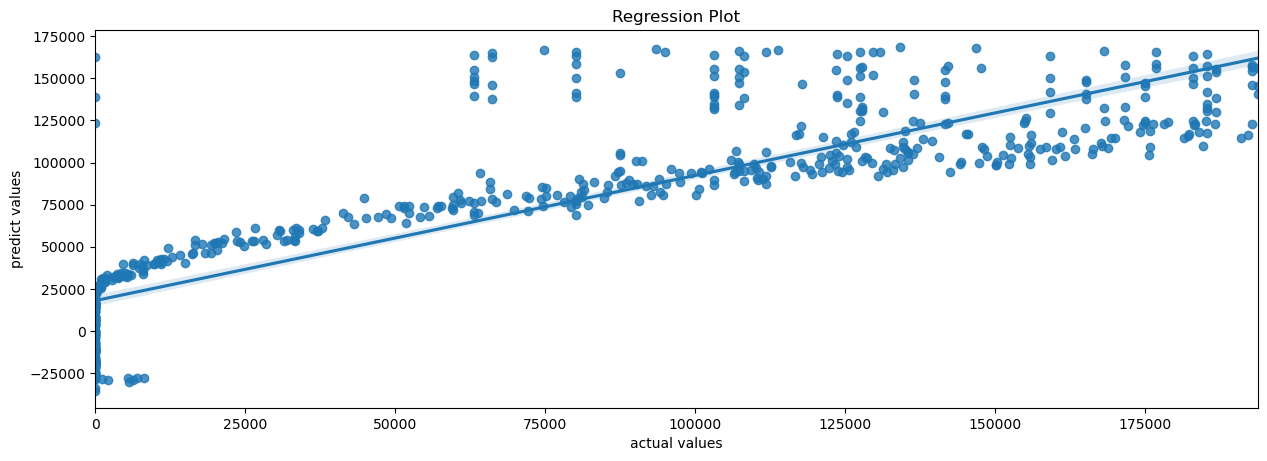

In [40]:
plt.figure(dpi=100, figsize=(15,5))
sns.regplot(x='actual values', y='predict values', data=ridge_compare)
plt.title('Regression Plot')
plt.show()

In [41]:
np.random.seed(42)
cv_ridge = cross_val_score(best_ridge, X, y, cv=10, scoring='r2', n_jobs=-1)
np.mean(cv_ridge)

0.730370414882213

## Random Forest Regressor Evaluation

In [42]:
rfr = RandomForestRegressor(n_jobs=-1, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [43]:
rfr_eval = evaluate_test(rfr)
rfr_eval

{'Mean Squared Error': 33153257.910491854,
 'Root Mean Squared Error': 5757.88658367737,
 'Mean Absolute Error': 2529.638103641971,
 'R2 Score': 0.9922872931056886,
 'Explained Variance Score': 0.9923063681282469}

In [44]:
test_preds3 = rfr.predict(X_test)
np.median(test_preds3)

68295.07443469003

In [45]:
rfr_compare = pd.DataFrame({
    "actual values": y_test,
    "predict values": test_preds3
})

rfr_compare['diff'] = rfr_compare['predict values'] - rfr_compare['actual values']
rfr_compare

,actual values,predict values,diff
3053,159056.000000,157115.900000,-1940.100000
2681,169895.178571,164870.657500,-5024.521071
2961,80126.000000,80126.000000,0.000000
2335,0.000000,0.000000,0.000000
139,54073.571429,45876.530714,-8197.040715
...,...,...,...
1229,185308.000000,184337.116786,-970.883214
2488,166298.500000,167757.500357,1459.000357
2522,0.000000,0.000000,0.000000
2234,108152.000000,108152.000000,0.000000


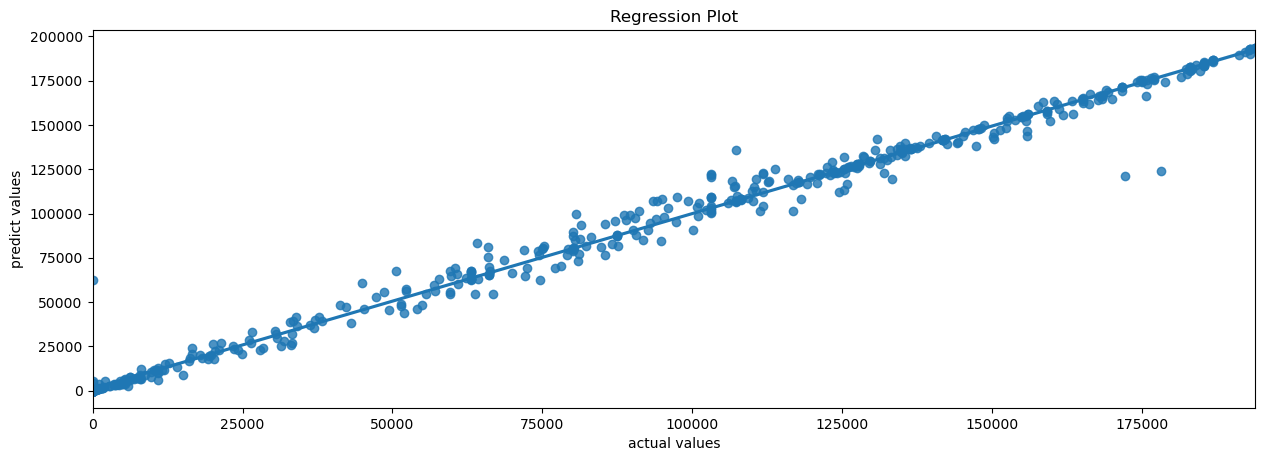

In [46]:
plt.figure(dpi=100, figsize=(15,5))
sns.regplot(x='actual values', y='predict values', data=rfr_compare)
plt.title('Regression Plot')
plt.show()

In [47]:
rcv_grid = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto']
}

rfr_rcv = RandomizedSearchCV(estimator=RandomForestRegressor(
    n_jobs=-1, random_state=42), param_distributions=rcv_grid, cv=10, verbose=True, n_iter=30)
rfr_rcv.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   33.1s finished


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [48]:
rfr_rcv.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [49]:
best_rfr = RandomForestRegressor(n_jobs=-1, random_state=42, **rfr_rcv.best_params_)
best_rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=42)

In [50]:
best_rfr_eval = evaluate_test(best_rfr)
best_rfr_eval

{'Mean Squared Error': 34355024.93036799,
 'Root Mean Squared Error': 5861.315972575441,
 'Mean Absolute Error': 2592.6423621375006,
 'R2 Score': 0.9920077164557987,
 'Explained Variance Score': 0.9920325987127766}

# Plant 2 (import and cleaning)

In [51]:
plant2 = pd.read_csv(
    'solar_data/Plant_2_Generation_Data.csv', low_memory=False)
plant2

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [52]:
plant2 = plant2.groupby('DATE_TIME')[
    ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].agg('sum')
plant2

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,
2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10
2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10
2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10
2020-05-15 00:45:00,0.0,0.0,28401.000000,1.418960e+10
2020-05-15 01:00:00,0.0,0.0,26516.000000,1.418960e+10
...,...,...,...,...
2020-06-17 22:45:00,0.0,0.0,93040.000000,1.419408e+10
2020-06-17 23:00:00,0.0,0.0,93040.000000,1.419408e+10
2020-06-17 23:15:00,0.0,0.0,93040.000000,1.419408e+10


In [53]:
plant2.reset_index(inplace=True)
plant2

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10
3,2020-05-15 00:45:00,0.0,0.0,28401.000000,1.418960e+10
4,2020-05-15 01:00:00,0.0,0.0,26516.000000,1.418960e+10
...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,0.0,93040.000000,1.419408e+10
3255,2020-06-17 23:00:00,0.0,0.0,93040.000000,1.419408e+10
3256,2020-06-17 23:15:00,0.0,0.0,93040.000000,1.419408e+10
3257,2020-06-17 23:30:00,0.0,0.0,93040.000000,1.419408e+10


In [54]:
plant2['DATE_TIME'] = pd.to_datetime(plant2['DATE_TIME'])
plant2['Year'] = plant2['DATE_TIME'].dt.year
plant2['Month'] = plant2['DATE_TIME'].dt.month
plant2['Day'] = plant2['DATE_TIME'].dt.day
plant2['Hour'] = plant2['DATE_TIME'].dt.hour
plant2['Minute'] = plant2['DATE_TIME'].dt.minute
plant2

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Year,Month,Day,Hour,Minute
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,1.418960e+10,2020,5,15,0,0
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,1.418960e+10,2020,5,15,0,15
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,1.418960e+10,2020,5,15,0,30
3,2020-05-15 00:45:00,0.0,0.0,28401.000000,1.418960e+10,2020,5,15,0,45
4,2020-05-15 01:00:00,0.0,0.0,26516.000000,1.418960e+10,2020,5,15,1,0
...,...,...,...,...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,0.0,93040.000000,1.419408e+10,2020,6,17,22,45
3255,2020-06-17 23:00:00,0.0,0.0,93040.000000,1.419408e+10,2020,6,17,23,0
3256,2020-06-17 23:15:00,0.0,0.0,93040.000000,1.419408e+10,2020,6,17,23,15
3257,2020-06-17 23:30:00,0.0,0.0,93040.000000,1.419408e+10,2020,6,17,23,30


In [55]:
del plant2['DATE_TIME']
del plant2['Year']
plant2

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Month,Day,Hour,Minute
0,0.0,0.0,48899.938095,1.418960e+10,5,15,0,0
1,0.0,0.0,28401.000000,1.418960e+10,5,15,0,15
2,0.0,0.0,28401.000000,1.418960e+10,5,15,0,30
3,0.0,0.0,28401.000000,1.418960e+10,5,15,0,45
4,0.0,0.0,26516.000000,1.418960e+10,5,15,1,0
...,...,...,...,...,...,...,...,...
3254,0.0,0.0,93040.000000,1.419408e+10,6,17,22,45
3255,0.0,0.0,93040.000000,1.419408e+10,6,17,23,0
3256,0.0,0.0,93040.000000,1.419408e+10,6,17,23,15
3257,0.0,0.0,93040.000000,1.419408e+10,6,17,23,30


# Plant 2 Modeling

## Split data and find base result

In [56]:
X2 = plant2.drop(columns=['DAILY_YIELD'], axis=1)
y2 = plant2['DAILY_YIELD']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((2526, 7), (2526,), (632, 7), (632,))

In [57]:
base_results2 = fit_scores(models, X_train2, X_test2, y_train2, y_test2)
base_results2

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1392942230328.6929, tolerance: 1102452673.8365915
  model = cd_fast.enet_coordinate_descent(


{'Elastic Net': 0.7446002487811549,
 'Ridge': 0.7447312882996436,
 'Random Forest': 0.9922872931056886}

## Test Elastic Net model from plant 1 

In [58]:
best_EN.fit(X_train2, y_train2)

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1349388463107.715, tolerance: 1102452673.8365915
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.001, l1_ratio=0.6000000000000001, max_iter=5,
           random_state=42, selection='random')

In [59]:
best_EN.score(X_test2, y_test2)

0.7446766222551322

## Test Ridge model from plant 1

In [60]:
best_ridge.score(X_test2, y_test2)

0.7447312882996436

## Test Random Forest model from plant 1

In [65]:
best_rfr.score(X_test2, y_test2)

0.9920077164557987